# Diabetes Patient Prediction

In [1]:
# Import necessary libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import OneHotEncoder 
from sklearn.model_selection import train_test_split


from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn import feature_selection
from sklearn import model_selection
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay


import warnings
warnings.simplefilter("ignore")


SEED = 12345




In [2]:
# Importing the dataset

df = pd.read_csv(r"C:\Users\Microsoft\Documents\All Notes\diabetes.csv")
df.head(25)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0             6      148             72             35        0  33.6   
1             1       85             66             29        0  26.6   
2             8      183             64              0        0  23.3   
3             1       89             66             23       94  28.1   
4             0      137             40             35      168  43.1   
5             5      116             74              0        0  25.6   
6             3       78             50             32       88  31.0   
7            10      115              0              0        0  35.3   
8             2      197             70             45      543  30.5   
9             8      125             96              0        0   0.0   
10            4      110             92              0        0  37.6   
11           10      168             74              0        0  38.0   
12           10      139             80              0        0  27.1   
13            1      189             60             23      846  30.1   
14            5      166             72             19      175  25.8   
15            7      100              0              0        0  30.0   
16            0      118             84             47      230  45.8   
17            7      107             74              0        0  29.6   
18            1      103             30             38       83  43.3   
19            1      115             70             30       96  34.6   
20            3      126             88             41      235  39.3   
21            8       99             84              0        0  35.4   
22            7      196             90              0        0  39.8   
23            9      119             80             35        0  29.0   
24           11      143             94             33      146  36.6   

    DiabetesPedigreeFunction  Age  Outcome  
0                      0.627   50        1  
1                      0.351   31        0  
2                      0.672   32        1  
3                      0.167   21        0  
4                      2.288   33        1  
5                      0.201   30        0  
6                      0.248   26        1  
7                      0.134   29        0  
8                      0.158   53        1  
9                      0.232   54        1  
10                     0.191   30        0  
11                     0.537   34        1  
12                     1.441   57        0  
13                     0.398   59        1  
14                     0.587   51        1  
15                     0.484   32        1  
16                     0.551   31        1  
17                     0.254   31        1  
18                     0.183   33        0  
19                     0.529   32        1  
20                     0.704   27        0  
21                     0.388   50        0  
22                     0.451   41        1  
23                     0.263   29        1  
24                     0.254   51        1

In [3]:
df.shape

(768, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()


Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [6]:
df.corr()

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221071                  0.137337   
BloodPressure             0.088933  0.281805                  0.041265   
SkinThickness             0.436783  0.392573                  0.183928   
Insulin                   1.000000  0.197859                  0.185071   
BMI                       0.197859  1.000000                  0.140647   
DiabetesPedigreeFunction  0.185071  0.140647                  1.000000   
Age                      -0.042163  0.036242                  0.033561   
Outcome                   0.130548  0.292695                  0.173844   

                               Age   Outcome  
Pregnancies               0.544341  0.221898  
Glucose                   0.263514  0.466581  
BloodPressure             0.239528  0.065068  
SkinThickness            -0.113970  0.074752  
Insulin                  -0.042163  0.130548  
BMI                       0.036242  0.292695  
DiabetesPedigreeFunction  0.033561  0.173844  
Age                       1.000000  0.238356  
Outcome                   0.238356  1.000000

In [7]:
df.groupby('Age').mean()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
Age                                                                      
21      1.079365  108.317460      65.936508      19.349206   73.634921   
22      1.555556  108.208333      63.722222      20.486111   74.486111   
23      1.578947  111.578947      64.315789      22.368421  118.026316   
24      1.891304  117.891304      64.956522      25.934783   88.021739   
25      1.770833  110.083333      59.666667      23.958333   82.895833   
26      1.969697  118.212121      64.181818      23.666667   90.878788   
27      2.562500  115.281250      73.500000      18.375000   63.125000   
28      3.028571  119.914286      68.314286      23.628571   94.600000   
29      3.310345  127.379310      68.241379      21.000000   88.793103   
30      3.619048  122.285714      64.857143      18.904762   82.666667   
31      3.875000  126.958333      64.375000      20.000000  111.166667   
32      4.437500  116.312500      70.062500      18.187500   35.812500   
33      4.058824  122.882353      65.647059      21.705882   85.588235   
34      5.857143  131.857143      74.000000      18.714286  148.071429   
35      5.000000  121.400000      75.600000      22.600000   75.000000   
36      5.187500  132.437500      69.125000      19.187500   65.812500   
37      5.263158  130.157895      75.947368      18.315789   59.263158   
38      6.875000  121.125000      71.125000      19.625000   33.500000   
39      7.416667  126.750000      72.666667      26.083333   72.416667   
40      6.230769  130.923077      69.230769      24.230769   72.307692   
41      6.500000  129.090909      67.590909      17.409091   38.818182   
42      6.888889  109.555556      73.388889      19.222222   61.277778   
43      7.769231  133.000000      78.461538      27.846154  125.153846   
44      7.250000  124.375000      61.750000       4.625000   32.250000   
45      7.333333  131.200000      83.066667      20.600000   31.133333   
46      6.384615  105.923077      76.000000      24.153846  112.307692   
47      8.333333  137.000000      78.333333      14.500000   49.166667   
48      8.800000  107.600000      78.400000      23.400000   52.000000   
49      7.600000  153.000000      81.400000      21.600000   55.200000   
50      6.750000  138.250000      78.250000      16.000000   26.375000   
51      8.625000  147.625000      84.500000      21.875000  129.375000   
52      4.625000  133.000000      81.500000      13.375000   94.500000   
53      5.400000  158.000000      79.000000      21.200000  183.000000   
54      7.000000  140.333333      89.333333       8.833333   61.000000   
55      5.500000  140.750000      70.250000      16.250000   83.750000   
56      8.000000   98.333333      76.333333      32.333333   69.000000   
57      8.800000  137.800000      76.800000       9.600000   78.000000   
58      7.142857  135.142857      78.285714      19.285714  167.857143   
59      2.333333  173.333333      74.000000      16.666667  282.000000   
60      6.000000  146.400000      80.000000      20.000000  164.200000   
61      5.500000  144.000000      76.000000      16.500000   95.000000   
62      3.750000  139.500000      71.500000      29.000000    0.000000   
63      5.500000  133.250000      78.000000      23.500000   45.000000   
64      8.000000  120.000000      78.000000       0.000000    0.000000   
65      3.333333  137.000000      78.666667      12.333333    0.000000   
66      5.000000  157.000000      86.000000       0.000000    0.000000   
67      4.000000  132.333333      72.666667       0.000000    0.000000   
68      8.000000   91.000000      82.000000       0.000000    0.000000   
69      5.000000  134.000000      81.000000       0.000000    0.000000   
70      4.000000  145.000000      82.000000      18.000000    0.000000   
72      2.000000  119.000000       0.000000       0.000000    0.000000   
81      9.000000  134.000000      74.000000      33.000000   60.000000   

        

# Data Analysis

<Axes: xlabel='Outcome', ylabel='Density'>

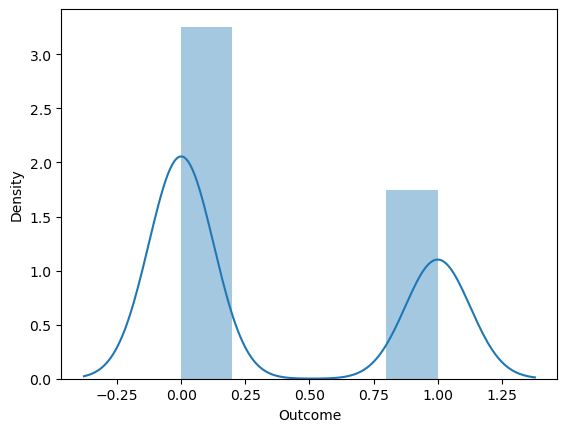

In [8]:
sns.distplot(df['Outcome'])

<Axes: xlabel='Pregnancies', ylabel='Density'>

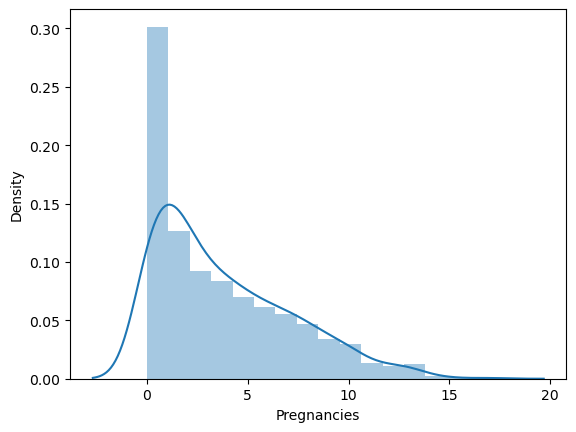

In [9]:
sns.distplot(df['Pregnancies'])

<Axes: xlabel='BMI', ylabel='Density'>

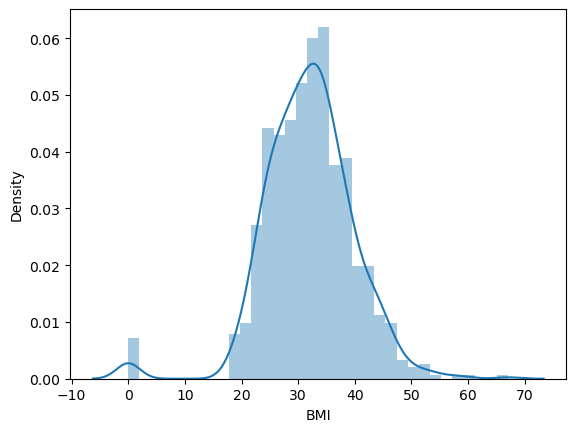

In [10]:
sns.distplot(df['BMI'])

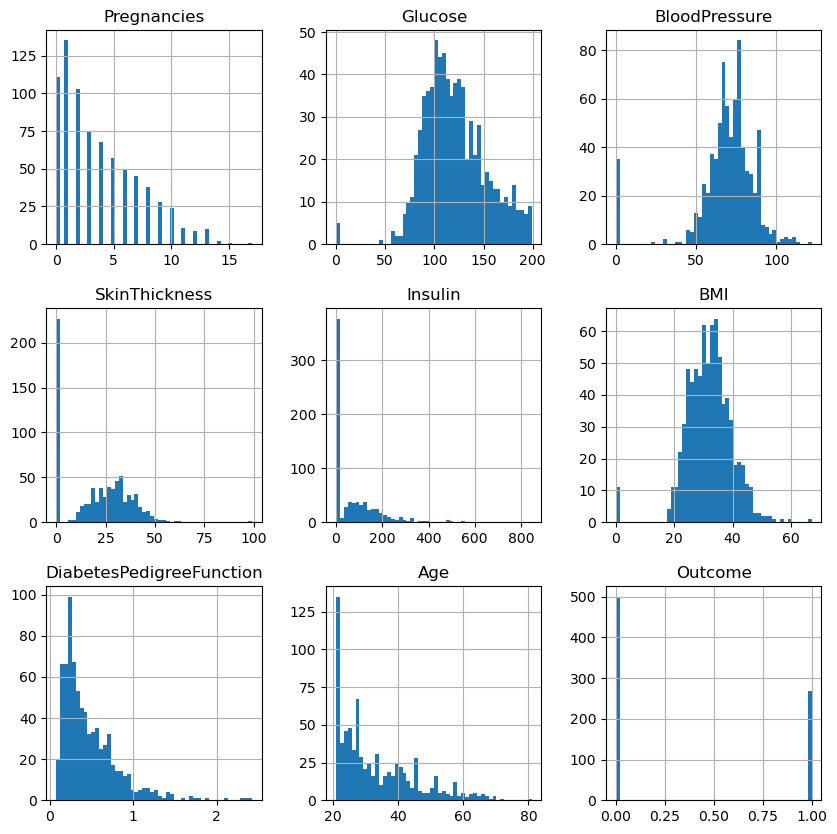

In [11]:
df.hist(figsize=(10,10),bins=50)
plt.show()

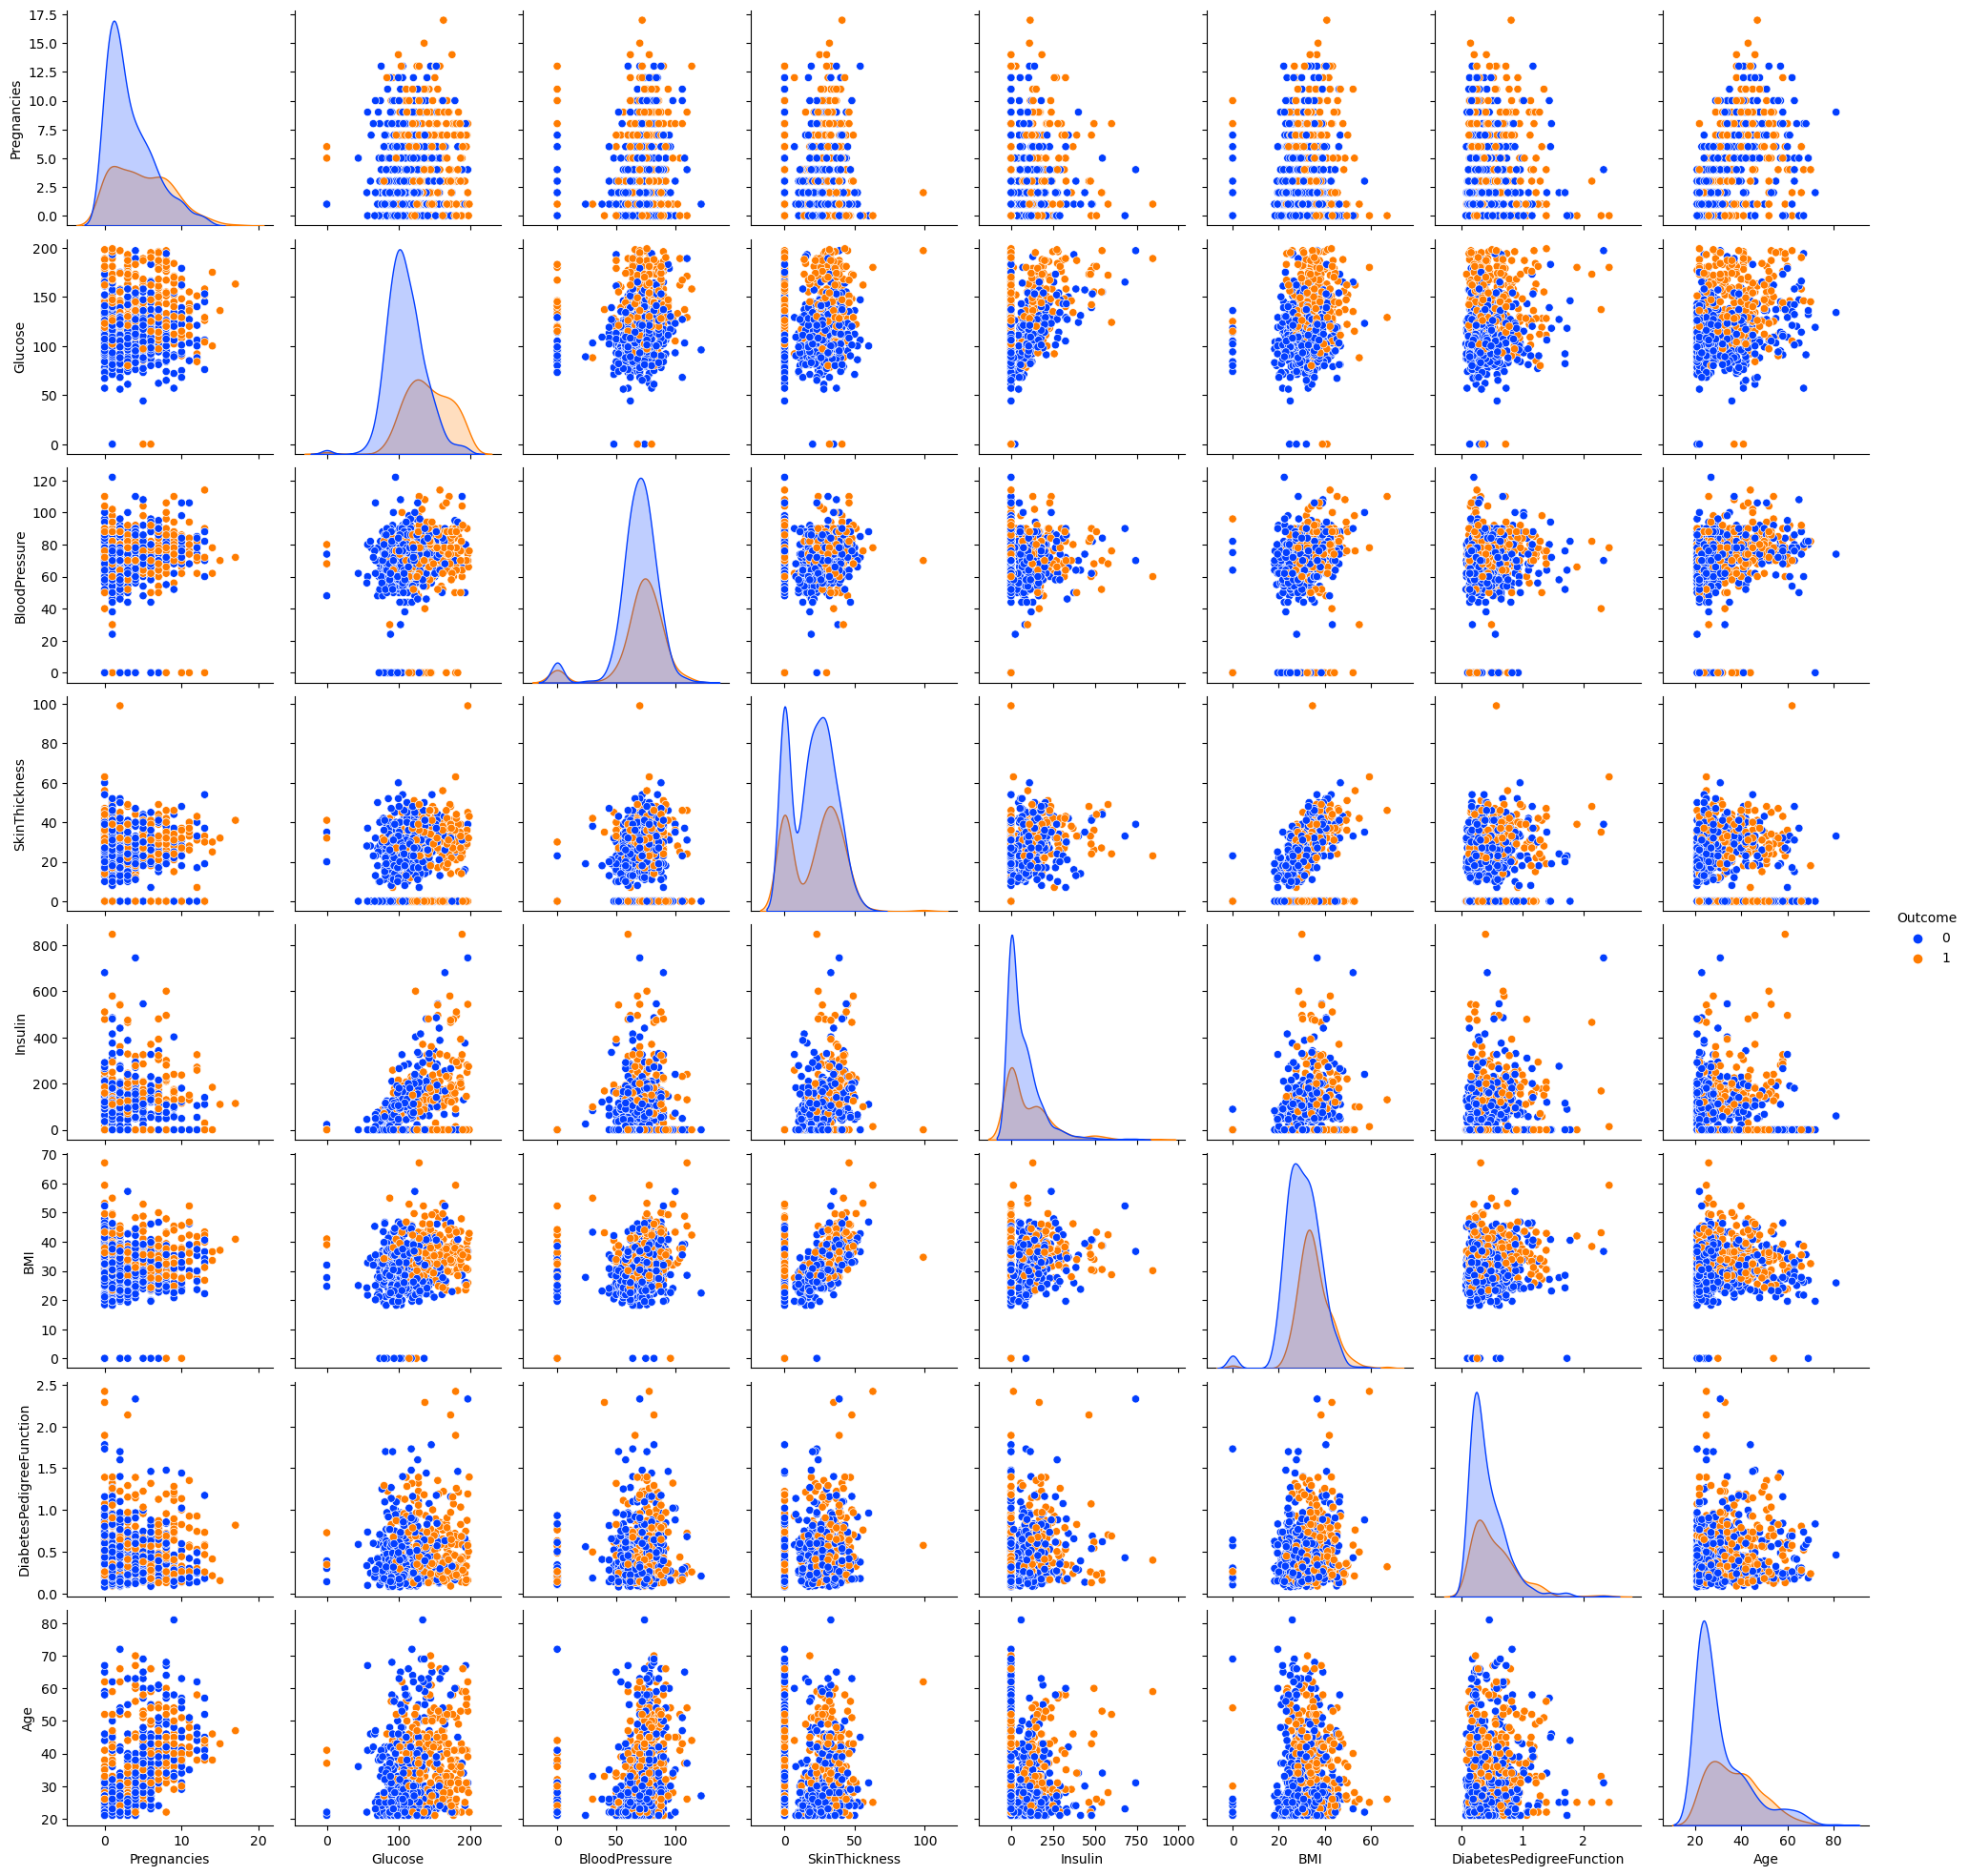

In [12]:
df = df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']]
sns.pairplot(df, hue="Outcome", palette="bright")
plt.show()
     

<Axes: >

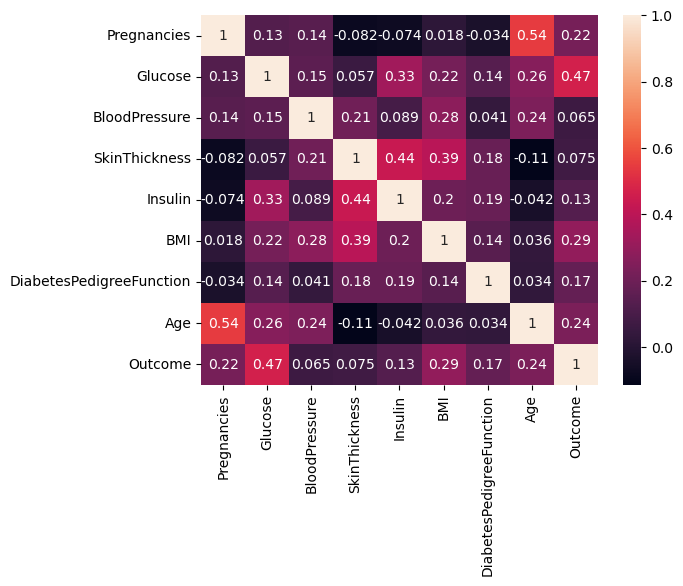

In [13]:
corr = df.corr()
sns.heatmap(corr,annot=True)

<Axes: >

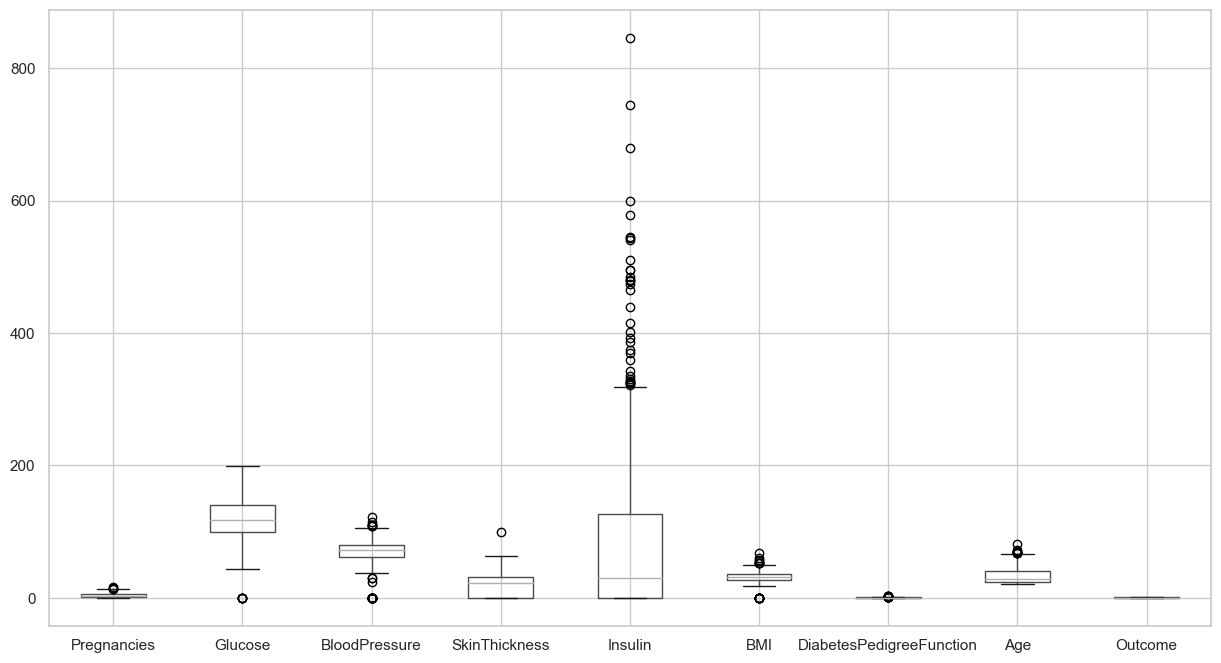

In [14]:
sns.set(style="whitegrid")
df.boxplot(figsize=(15,8))

# Data Prepearation

In [15]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1

print("---Q1--- \n",Q1)
print("\n---Q3--- \n",Q3)
print("\n---IQR---\n",IQR)


---Q1--- 
 Pregnancies                  1.00000
Glucose                     99.00000
BloodPressure               62.00000
SkinThickness                0.00000
Insulin                      0.00000
BMI                         27.30000
DiabetesPedigreeFunction     0.24375
Age                         24.00000
Outcome                      0.00000
Name: 0.25, dtype: float64

---Q3--- 
 Pregnancies                   6.00000
Glucose                     140.25000
BloodPressure                80.00000
SkinThickness                32.00000
Insulin                     127.25000
BMI                          36.60000
DiabetesPedigreeFunction      0.62625
Age                          41.00000
Outcome                       1.00000
Name: 0.75, dtype: float64

---IQR---
 Pregnancies                   5.0000
Glucose                      41.2500
BloodPressure                18.0000
SkinThickness                32.0000
Insulin                     127.2500
BMI                           9.3000
DiabetesPedigr

In [16]:
y = df.Outcome
x = df.drop('Outcome',axis=1)

In [17]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.40)

In [18]:
print(x_train.shape)
print(x_test.shape)

(460, 8)
(308, 8)


In [19]:
models = []
hyperparameters = []
AUC = []
ACC = []

# Logistic model

models.append('Logistic Regression')
hyperparameters.append('N/A')
model = LogisticRegression().fit(x_train,y_train)
y_pred = model.predict(x_test)
y_proba_log = model.predict_proba(x_test)[:,1]
AUC.append(round(roc_auc_score(y_test,y_proba_log),2))
ACC.append(round(accuracy_score(y_test,y_pred),3))

# Gaussian model

models.append('Gaussian NB')
hyperparameters.append('N/A')
model = GaussianNB().fit(x_train,y_train)
y_pred = model.predict(x_test)
y_proba_GNB = model.predict_proba(x_test)[:,1]
AUC.append(round(roc_auc_score(y_test,y_proba_GNB),2))
ACC.append(round(accuracy_score(y_test,y_pred),2))

# SVM model

models.append('SVM')
svc_params = {
    'kernel' : ['linear','rbf','poly','sigmoid']
}
svc_grid = GridSearchCV(SVC(probability=True),param_grid=svc_params,scoring='roc_auc',cv=5).fit(x_train,y_train)
y_pred=svc_grid.predict(x_test)
y_proba_svm = svc_grid.predict_proba(x_test)[:,1]
hyperparameters.append('kernel:'+svc_grid.best_params_['kernel'])
AUC.append(round(roc_auc_score(y_test,y_proba_svm),2))
ACC.append(round(accuracy_score(y_test,y_pred),2))

#Decision Tree model

models.append('Decision Tree')
dt_params = {
    'max_depth': np.arange(0,35,5)
    
}
dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=0),param_grid=dt_params,scoring='roc_auc',cv=5).fit(x_train, y_train)
y_pred=dt_grid.predict(x_test)
y_proba_dt = dt_grid.predict_proba(x_test)[:,1]
hyperparameters.append('max_depth:'+ str(dt_grid.best_params_['max_depth']))
AUC.append(round(roc_auc_score(y_test,y_proba_dt),2))
ACC.append(round(accuracy_score(y_test,y_pred),2))

# KNN with Hyperparameter Tuning(n_neighbors)

models.append('KNN')
knn_params = {
    'n_neighbors':np.arange(1,31)
}
knn_grid = GridSearchCV(KNeighborsClassifier(),param_grid=knn_params,scoring='roc_auc',cv=5).fit(x_train,y_train)
y_pred=knn_grid.predict(x_test)
y_proba_knn = knn_grid.predict_proba(x_test)[:,1]
hyperparameters.append('n_neighbors:'+str(knn_grid.best_params_['n_neighbors']))
AUC.append(round(roc_auc_score(y_test,y_proba_knn),2))
ACC.append(round(accuracy_score(y_test,y_pred),2))

# Random Forest with Hyperparameter Tuning

models.append('Random Forest')
rf_params = {
    'n_estimators':np.arange(50,250,50),
    'max_depth':np.arange(0,55,5),
    'bootstrap':[True,False],
    'max_features':['sqrt','log2',None],
    'min_samples_leaf':[1,2,4],
    'min_samples_split':[2,5,10],
}
rf_grid = RandomizedSearchCV(RandomForestClassifier(),
                            param_distributions = rf_params, n_iter = 100,
                            cv = 5, verbose=2, random_state=42, n_jobs= -1).fit(x_train,y_train)
y_pred=rf_grid.predict(x_test)
y_proba_rf = rf_grid.predict_proba(x_test)[:,1]
hyperparameters.append('n_estimators:'+str(rf_grid.best_params_['n_estimators']))
AUC.append(round(roc_auc_score(y_test,y_proba_rf),2))
ACC.append(round(accuracy_score(y_test,y_pred),2))

df_summary = pd.DataFrame({
    'Model':models,
    'Hyperparameters':hyperparameters,
    'Accuracy test':ACC,
    'AUC test':AUC
})

# print table

display(df_summary.sort_values(by=['AUC test','Accuracy test'],ascending=False))

Fitting 5 folds for each of 100 candidates, totalling 500 fits


Model   Hyperparameters  Accuracy test  AUC test
0  Logistic Regression               N/A          0.782      0.84
2                  SVM     kernel:linear          0.770      0.83
1          Gaussian NB               N/A          0.760      0.80
5        Random Forest  n_estimators:100          0.750      0.80
4                  KNN    n_neighbors:16          0.740      0.79
3        Decision Tree       max_depth:5          0.740      0.75

# Random Forest

<Axes: >

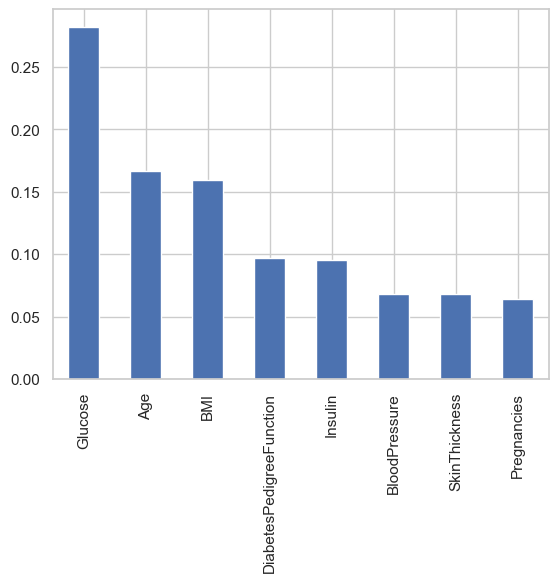

In [20]:
# Access the best estimator from the RandomizedSearchCV

best_rf_model = rf_grid.best_estimator_

# Create a series containing feature importance from the model and feature names from the training data

feature_importances = pd.Series(best_rf_model.feature_importances_, index=x_train.columns).sort_values(ascending=False)

# plot a simple bar chart

feature_importances.plot.bar()

In [21]:
rf_grid.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 40,
 'bootstrap': False}

In [22]:
y_pred = rf_grid.predict(x_test)
y_proba_rf = rf_grid.predict_proba(x_test)[:,1]

rfca_accuracy = round(accuracy_score(y_test,y_pred),3)
rfca_auc = round(roc_auc_score(y_test,y_proba_rf),2)

print("Out-of-sample Accuracy of random forest:",rfca_accuracy)
print("Out-of-sample AUC of SVC",rfca_auc)

Out-of-sample Accuracy of random forest: 0.747
Out-of-sample AUC of SVC 0.8


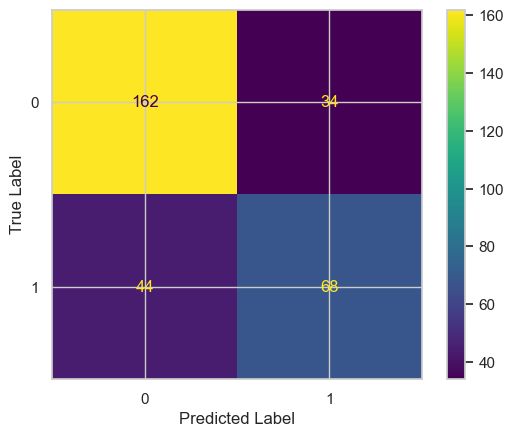

In [23]:
rfca_cm = confusion_matrix(y_test,y_pred)

# Create a ConfusionMatrixDisplay object

disp = ConfusionMatrixDisplay(confusion_matrix=rfca_cm)
disp.plot()

# Add axis labels and title

plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.show()

In [24]:
# Confusion matrix values  

TP = rfca_cm[1,1]
FP = rfca_cm[0,1]
TN = rfca_cm[0,0]
FN = rfca_cm[1,0]

# Calculate True positive rate(TPR) and false positive rate (FPR)

TPR = TP / (TP + FN)
FPR = FP / (FP + TN)

print("True Positive Rate:",round(TPR,3))
print("False Positive Rate:",round(FPR,3))

True Positive Rate: 0.607
False Positive Rate: 0.173


<Axes: xlabel='Outcome', ylabel='Age'>

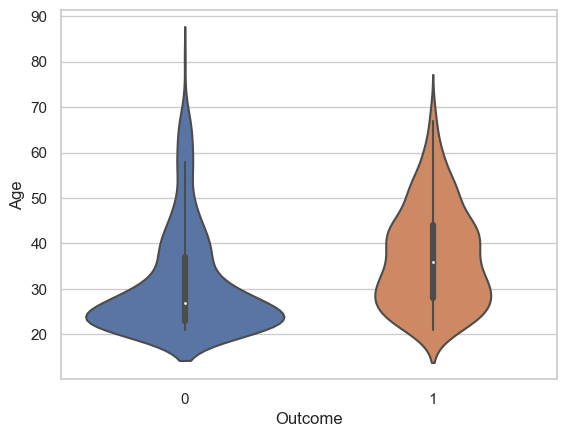

In [25]:
sns.violinplot(x='Outcome',y='Age',data=df)

<Axes: xlabel='Outcome', ylabel='BloodPressure'>

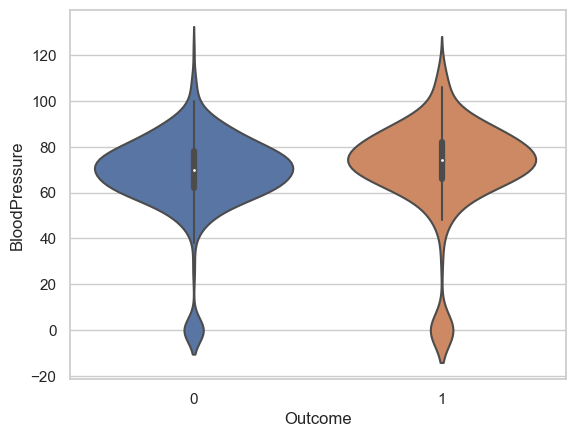

In [26]:
sns.violinplot(x='Outcome',y='BloodPressure',data=df)

<Axes: xlabel='Outcome', ylabel='SkinThickness'>

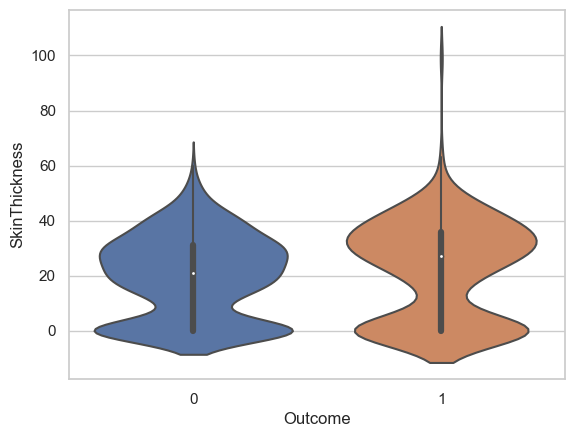

In [27]:
sns.violinplot(x='Outcome',y='SkinThickness',data=df)

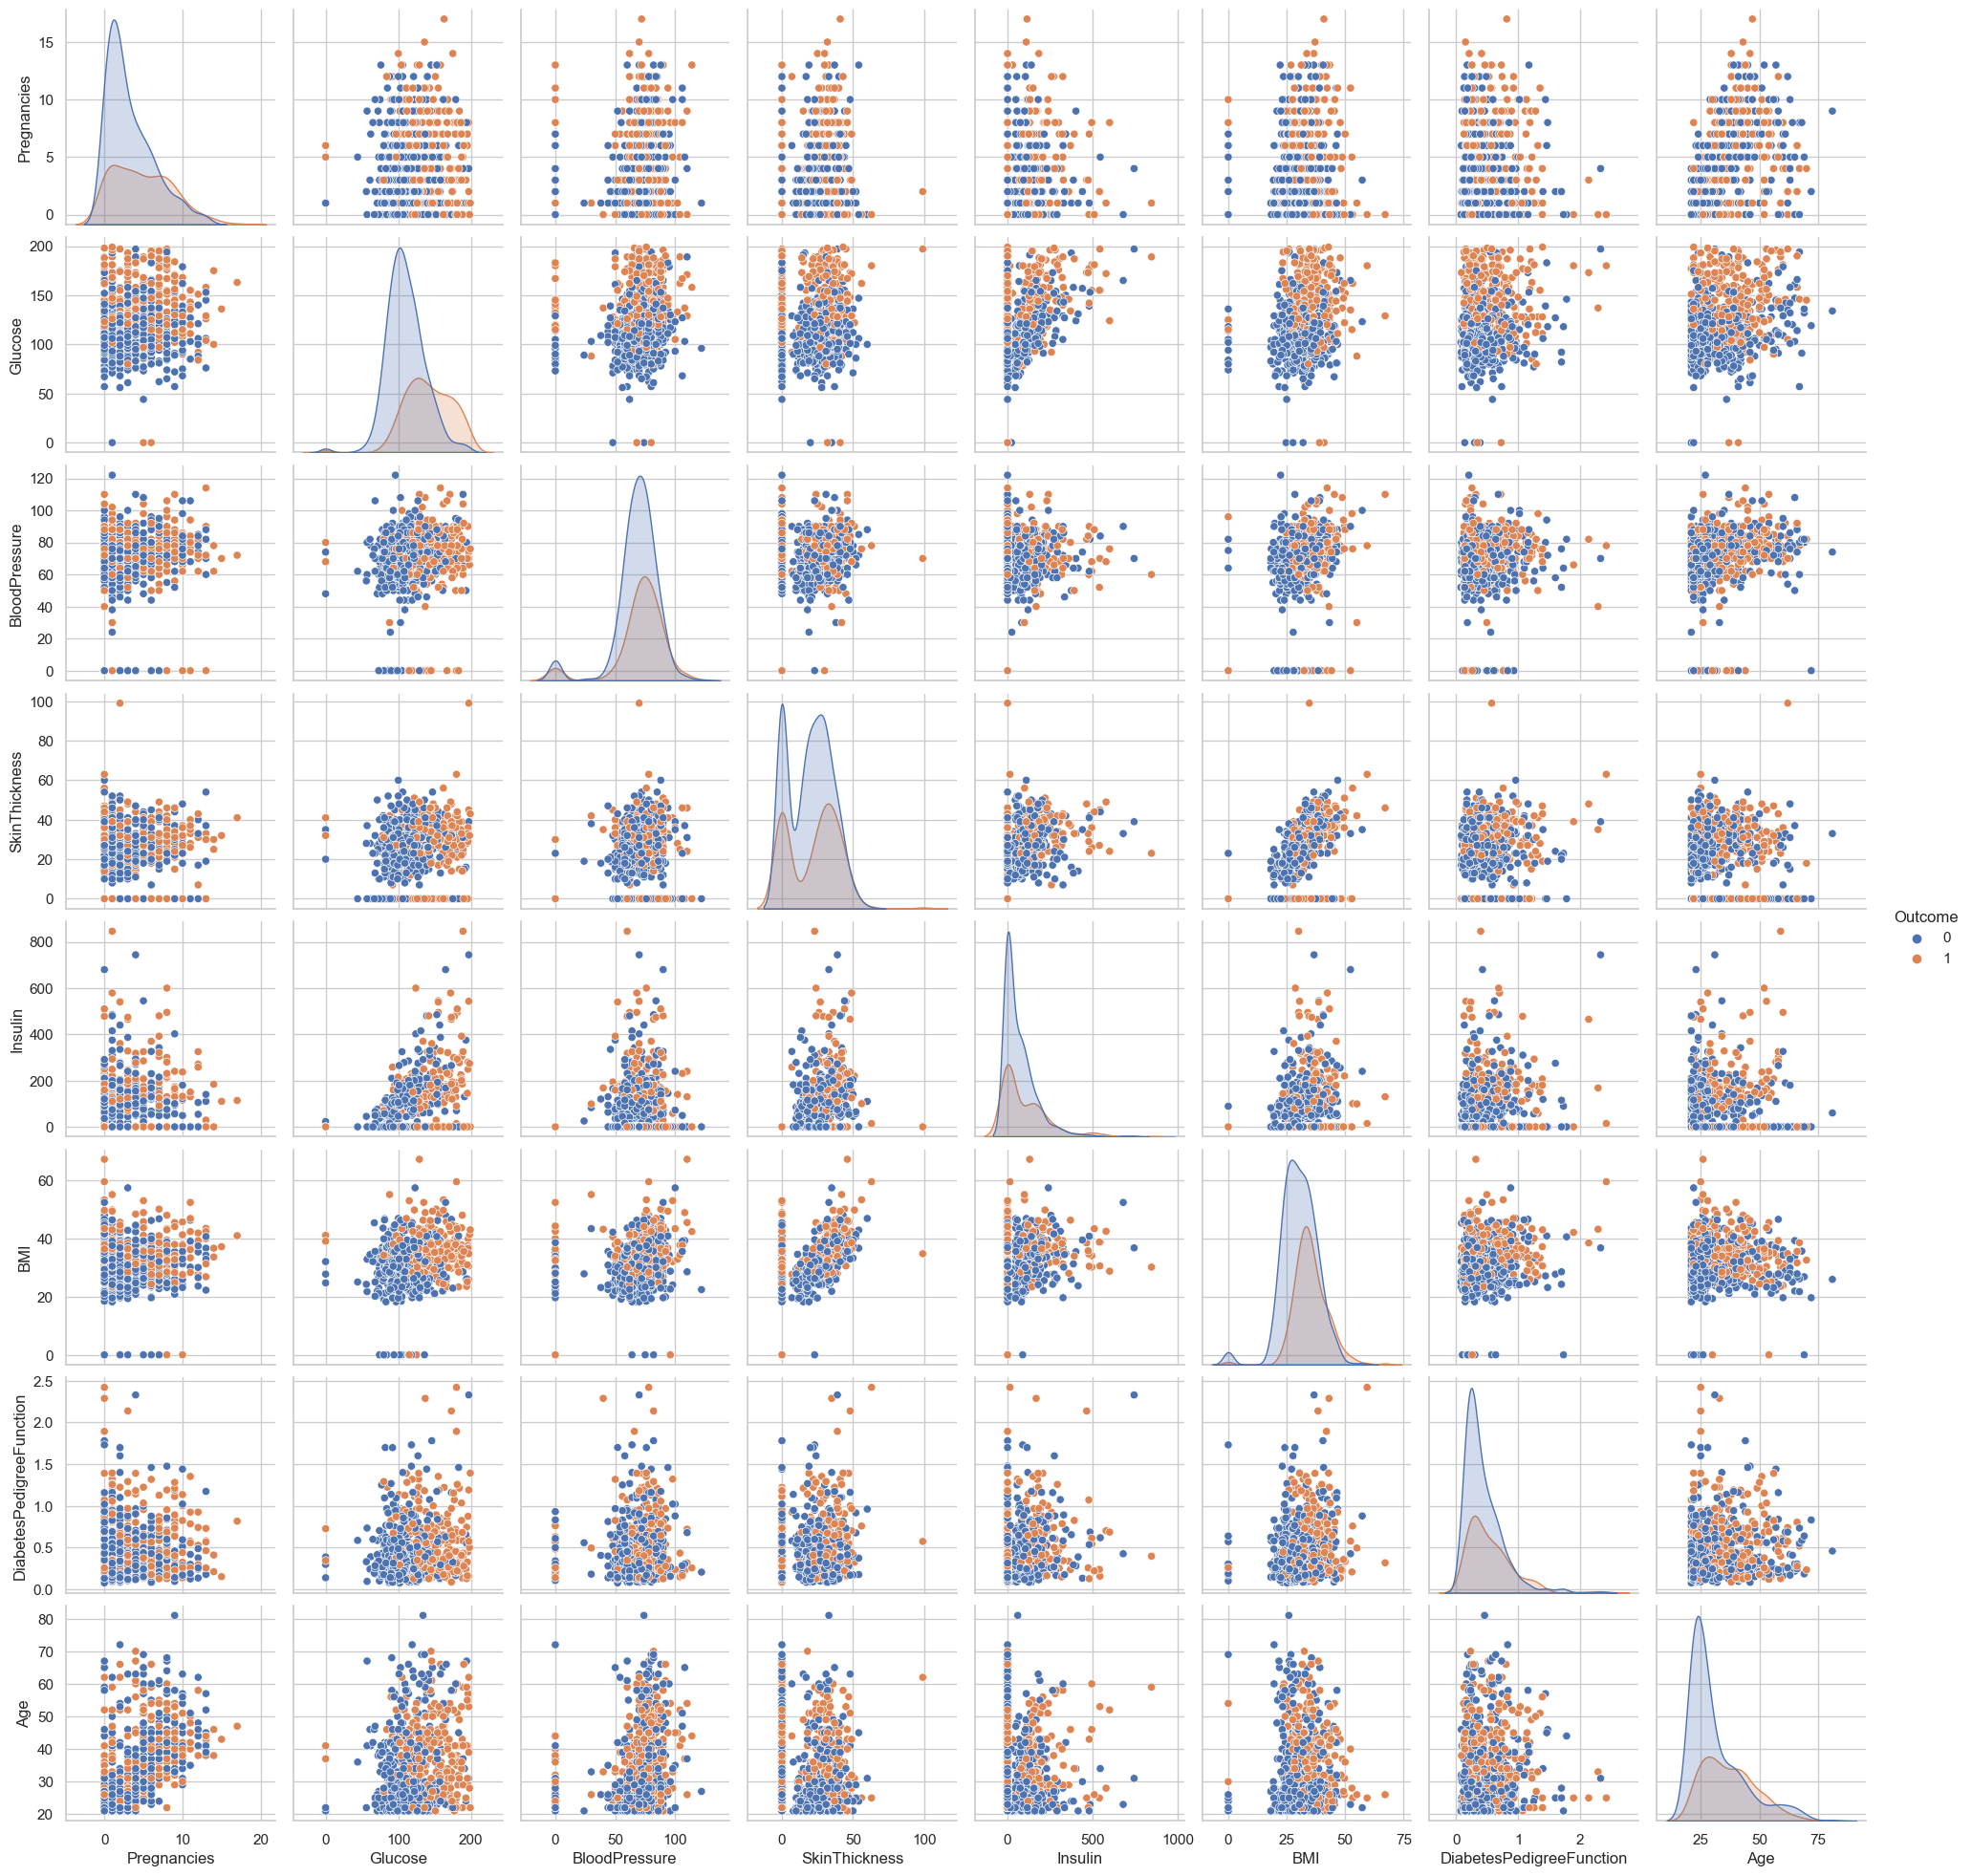

In [28]:
sns.pairplot(df,hue='Outcome');

# Feature Selection

In [30]:
# lets extract features and targets

X = df.drop(columns=['Outcome'])
Y = df['Outcome']
print("Features extraction sucessfull")

Features extraction sucessfull


# Feature Importance

In [31]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

from sklearn.ensemble import ExtraTreesClassifier
classifiern = ExtraTreesClassifier()
classifiern.fit(X,Y)
score = classifiern.feature_importances_
print(score)

[0.11060145 0.22488767 0.10198493 0.07865945 0.07598101 0.14240777
 0.11940225 0.14607546]


# Splitting Dataset

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

# Using Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy Score:",accuracy_score(Y_test,Y_pred))

Accuracy Score: 0.7597402597402597


In [34]:
confusion_mat = confusion_matrix(Y_test,Y_pred)
print(confusion_mat)

[[83  8]
 [29 34]]


# Using KNN

In [36]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,Y_train)
pred_y = model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,pred_y))

Accuracy Score: 0.7012987012987013


# Using SVC

In [37]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,Y_train)
pred_y = model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,pred_y))

Accuracy Score: 0.7077922077922078


# Using Decision Tree

In [38]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy',random_state=7)
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred))

Accuracy Score: 0.7662337662337663


# Using GaussianNB

In [39]:
from sklearn.naive_bayes import GaussianNB
model3 = GaussianNB()
model3.fit(X_train,Y_train)
y_pred3 = model3.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred3))


Accuracy Score: 0.7467532467532467


# Using Xgboost

In [44]:
import xgboost as xgb
model5 = xgb.XGBClassifier(random_state=1)
model5.fit(X_train, Y_train)
y_pred5 = model5.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:", accuracy_score(Y_test,y_pred5))

Accuracy Score: 0.7272727272727273


In [45]:
results = pd.DataFrame({
    'Model':['Logistic Regession','KNN','SVC','Decision Tree','GaussianNB','Random Forest','Xgboost'],
    'Score':[0.779,0.720,0.733,0.681,0.733,0.753,0.740]})
result_df = results.sort_values(by='Score',ascending=False)
result_df = result_df.set_index('Score')
print(result_df)

                    Model
Score                    
0.779  Logistic Regession
0.753       Random Forest
0.740             Xgboost
0.733                 SVC
0.733          GaussianNB
0.720                 KNN
0.681       Decision Tree
